In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from datetime import datetime
import warnings

### Loading Raw Data

In [3]:
df_raw = pd.read_csv('GoogleAds_DataAnalytics_Sales_Uncleaned.csv')

print(f"Dataset shape: {df_raw.shape}")
print(f"Columns: {list(df_raw.columns)}")
df_raw.head(10)

Dataset shape: (2600, 13)
Columns: ['Ad_ID', 'Campaign_Name', 'Clicks', 'Impressions', 'Cost', 'Leads', 'Conversions', 'Conversion Rate', 'Sale_Amount', 'Ad_Date', 'Location', 'Device', 'Keyword']


,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic
5,A1005,DataAnalyticsCourse,195.0,3776.0,$243.57,10.0,8.0,NaN,$1315,16-11-2024,hyderabad,MOBILE,data anaytics training
6,A1006,Data Analytics Corse,116.0,4480.0,$237.79,17.0,5.0,0.043,$1640,06-11-2024,hyderabad,TABLET,data analytics course
7,A1007,Data Analytics Corse,184.0,5060.0,$229.61,23.0,3.0,0.016,$1509,2024/11/24,Hyderbad,TABLET,analytics for data
8,A1008,Data Analytics Corse,113.0,5434.0,NaN,27.0,4.0,0.058,$1362,2024/11/24,Hyderbad,Tablet,data anaytics training
9,A1009,Data Analytcis Course,166.0,3355.0,$186.78,24.0,9.0,0.054,$1029,2024/11/12,Hyderbad,Mobile,online data analytic


### Initial Exploratory Data Analysis

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            2600 non-null   object 
 1   Campaign_Name    2600 non-null   object 
 2   Clicks           2488 non-null   float64
 3   Impressions      2546 non-null   float64
 4   Cost             2503 non-null   object 
 5   Leads            2552 non-null   float64
 6   Conversions      2526 non-null   float64
 7   Conversion Rate  1974 non-null   float64
 8   Sale_Amount      2461 non-null   object 
 9   Ad_Date          2600 non-null   object 
 10  Location         2600 non-null   object 
 11  Device           2600 non-null   object 
 12  Keyword          2600 non-null   object 
dtypes: float64(5), object(8)
memory usage: 264.2+ KB


In [5]:
df_raw.isnull().sum() # Total null values for each column

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    626
Sale_Amount        139
Ad_Date              0
Location             0
Device               0
Keyword              0
dtype: int64

In [6]:
# ----- Finding the number of unique values for certain columns ----
print("Campaign Name Variations:")
print(df_raw['Campaign_Name'].value_counts())
print(f"\nTotal unique campaign names: {df_raw['Campaign_Name'].nunique()}")

print("\nDate Format Examples (first 20):")
print(df_raw['Ad_Date'].head(20).tolist())

print("\nLocation Variations:")
print(df_raw['Location'].value_counts())
print(f"Total unique locations: {df_raw['Location'].nunique()}")

print("\nDevice Variations:")
print(df_raw['Device'].value_counts())
print(f"Total unique devices: {df_raw['Device'].nunique()}")

print("\nKeyword Variations (top 10):")
print(df_raw['Keyword'].value_counts().head(10))

Campaign Name Variations:
Campaign_Name
Data Analytcis Course    680
Data Analytics Corse     647
DataAnalyticsCourse      637
Data Anlytics Corse      636
Name: count, dtype: int64

Total unique campaign names: 4

Date Format Examples (first 20):
['2024-11-16', '20-11-2024', '2024/11/16', '2024-11-26', '2024-11-22', '16-11-2024', '06-11-2024', '2024/11/24', '2024/11/24', '2024/11/12', '14-11-2024', '2024/11/22', '2024/11/27', '12-11-2024', '2024-11-04', '2024-11-29', '2024-11-10', '12-11-2024', '2024/11/07', '2024-11-05']

Location Variations:
Location
HYDERABAD    661
Hyderbad     656
hyderabad    650
hydrebad     633
Name: count, dtype: int64
Total unique locations: 4

Device Variations:
Device
MOBILE     311
desktop    305
Desktop    305
tablet     305
Mobile     291
TABLET     279
DESKTOP    278
mobile     276
Tablet     250
Name: count, dtype: int64
Total unique devices: 9

Keyword Variations (top 10):
Keyword
online data analytic      453
learn data analytics      444
data analy

### Creating an ETL Pipeline 

In [7]:
# ---- Standardizing Currency Formats ----
def clean_currency_formats(series): 
    return series.astype(str).str.replace("$", "").str.replace(",", "").replace("nan", np.nan).astype(float)

In [8]:
# ---- Standardize Date Formats ----
df_raw["Ad_Date"].head(30)

def clean_date_formats(dates):
    if pd.isna(dates):
        return None
    date_formats = ["%Y-%m-%d", "%d-%Y-%m", "%Y/%m/%d"]

    for format in date_formats:
        try:
            return datetime.strptime(str(dates), format).strftime("%Y-%m-%d")
        except ValueError: 
            continue
    return None 

In [9]:
# ---- Standardize Locations ----

def clean_locations(location):
    if pd.isna(location):
        return "Unknown" 

    location = str(location).strip()
    location_formats = {"HYDERABAD": "Hyderabad",
                        "Hyderbad": "Hyderabad", 
                        "hyderabad": "Hyderabad", 
                        "hydrebad": "Hyderabad"}
    for format in location_formats:
        if location == format:
            return location_formats[format]
    return location.title()
                        

In [10]:
# ---- Standardising Devices ---- 

def clean_devices(device): 
    
    if pd.isna(device):
        return "Unknown"
        
    return str(device).lower().strip().title()
    

In [11]:
# ---- Standardising Campaign Names ---- 

def clean_campaigns(campaign):
    if pd.isna(campaign):
        return "Unknown"
        
    campaign = str(campaign).strip()
    
    if re.search(r'data.*analyt', campaign, re.IGNORECASE):
        return "Data Analytics Course"
        
    return campaign

In [12]:
# ---- Standardising Keywords ---- 

def clean_keywords(keyword):
    if pd.isna(keyword):
        return "Unknown"
        
    keyword = str(keyword).strip()

    keyword = re.sub(r'analy?t[yi]cs?', 'analytics', keyword)
    keyword = re.sub(r'analy?tic', 'analytics', keyword)
    keyword = re.sub(r'anaytics', 'analytics', keyword)
    keyword = re.sub(r'\s+', ' ', keyword)
    
    return keyword.strip() 

### Applying ETL Pipeline

In [13]:
df = df_raw.copy()

print("\nStep 1: Cleaning currency columns")
df['Cost'] = clean_currency_formats(df['Cost'])
df['Sale_Amount'] = clean_currency_formats(df['Sale_Amount'])

print("Step 2: Standardizing dates")
df['Ad_Date'] = df['Ad_Date'].apply(clean_date_formats)
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'])

print("Step 3: Standardizing locations")
df['Location'] = df['Location'].apply(clean_locations)

print("Step 4: Standardizing devices")
df['Device'] = df['Device'].apply(clean_devices)

print("Step 5: Standardizing campaign names")
df['Campaign_Name'] = df['Campaign_Name'].apply(clean_campaigns)

print("Step 6: Standardizing keywords")
df['Keyword'] = df['Keyword'].apply(clean_keywords)

print("Step 7: Handling missing conversion rates")
df['Conversion_Rate_Original'] = df['Conversion Rate'] #Creating a copy of the original(with missing values) for safety
df['Conversion_Rate_Calculated'] = (df['Conversions'] / df['Clicks']).fillna(0) #Doing the conversion for missing values and filling others with 0
df['Conversion_Rate'] = df['Conversion Rate'].fillna(df['Conversion_Rate_Calculated'])#Finding if there are missing na values and adding the calculated values to these rows

print("\nData cleaning complete!")
df.info()


Step 1: Cleaning currency columns
Step 2: Standardizing dates
Step 3: Standardizing locations
Step 4: Standardizing devices
Step 5: Standardizing campaign names
Step 6: Standardizing keywords
Step 7: Handling missing conversion rates

Data cleaning complete!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Ad_ID                       2600 non-null   object        
 1   Campaign_Name               2600 non-null   object        
 2   Clicks                      2488 non-null   float64       
 3   Impressions                 2546 non-null   float64       
 4   Cost                        2503 non-null   float64       
 5   Leads                       2552 non-null   float64       
 6   Conversions                 2526 non-null   float64       
 7   Conversion Rate             1974 non-null   float64 

### Feature Engineering

In [14]:
df['CTR'] = (df['Clicks'] / df['Impressions']).replace([np.inf, -np.inf], 0).fillna(0)
df['CPC'] = (df['Cost'] / df['Clicks']).replace([np.inf, -np.inf], 0).fillna(0)
df['CPL'] = (df['Cost'] / df['Leads']).replace([np.inf, -np.inf], 0).fillna(0)
df['Cost_Per_Conversion'] = (df['Cost'] / df['Conversions']).replace([np.inf, -np.inf], 0).fillna(0)
df['Revenue_Per_Click'] = (df['Sale_Amount'] / df['Clicks']).replace([np.inf, -np.inf], 0).fillna(0)
df['ROI'] = ((df['Sale_Amount'] - df['Cost']) / df['Cost']).replace([np.inf, -np.inf], 0).fillna(0)
df['ROI_Percentage'] = df['ROI'] * 100
df['Profit'] = df['Sale_Amount'] - df['Cost']
df['Lead_Conversion_Rate'] = (df['Conversions'] / df['Leads']).fillna(0)

### Describing The Features Created

In [15]:
df[['CTR', 'CPC', 'CPL', 'Cost_Per_Conversion', 'Revenue_Per_Click', 'ROI', 'Profit', 'Lead_Conversion_Rate']].describe()


,CTR,CPC,CPL,Cost_Per_Conversion,Revenue_Per_Click,ROI,Profit,Lead_Conversion_Rate
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2366.000000,2600.000000
mean,0.029898,1.526244,11.289239,35.701418,10.435042,5.495966,1284.758897,0.343585
std,0.012728,0.634890,4.986186,18.370400,4.937892,2.250795,288.316512,0.190266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,757.190000,0.000000
25%,0.022647,1.216439,8.220993,23.938611,8.011480,4.496649,1032.777500,0.210526
50%,0.029411,1.489496,10.346984,31.664286,10.436157,5.726978,1287.710000,0.318182
75%,0.037404,1.914444,14.273281,46.364625,13.221580,7.058529,1531.092500,0.444444
max,0.065470,3.089500,24.961000,83.216667,24.432099,10.052632,1814.500000,1.000000


### Visualizations of Key Metrices

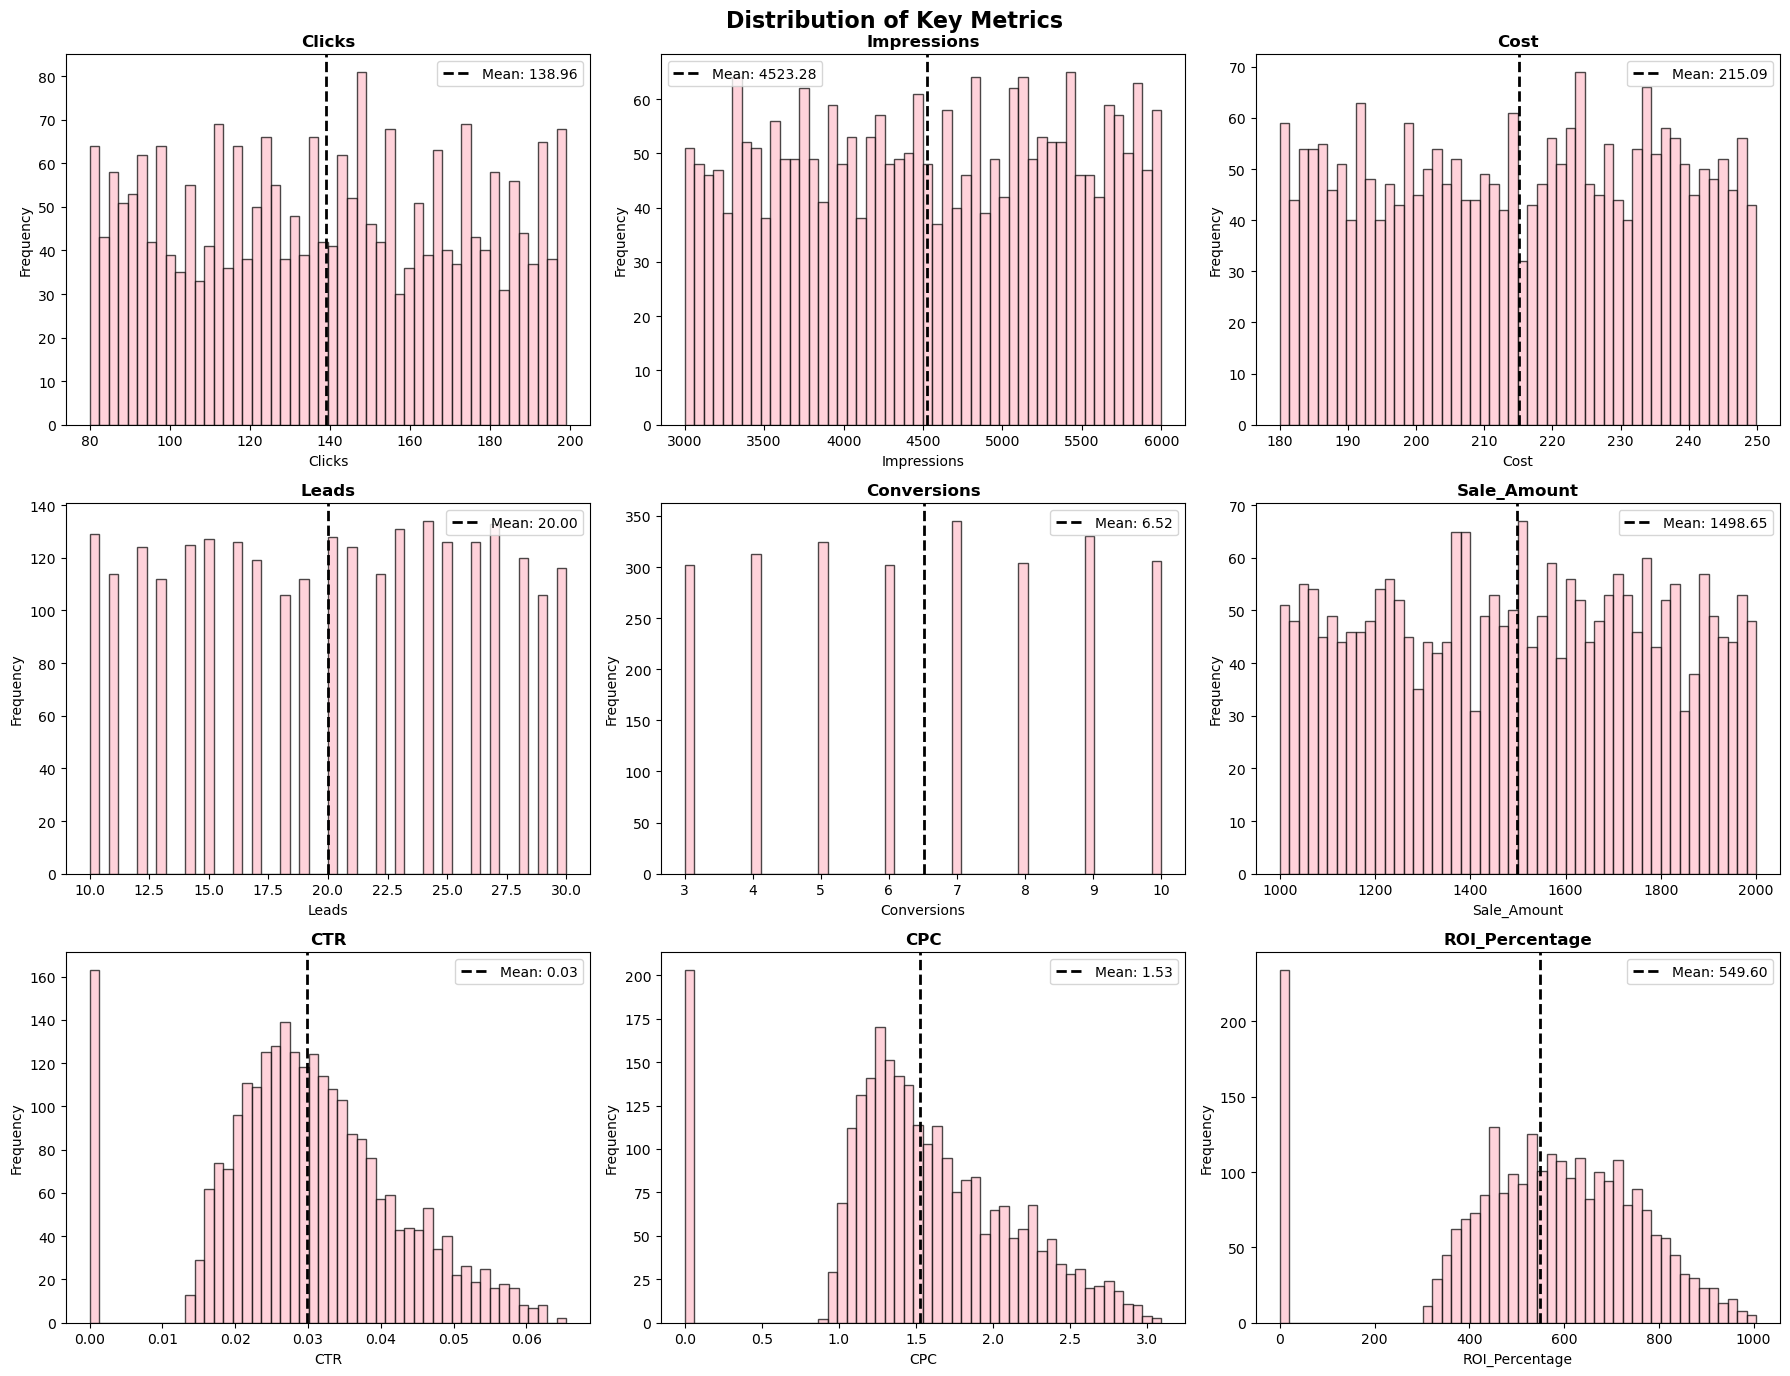

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Distribution of Key Metrics', fontsize=16, fontweight='bold')

metrics = ['Clicks', 'Impressions', 'Cost', 'Leads', 'Conversions', 'Sale_Amount', 'CTR', 'CPC', 'ROI_Percentage']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    data = df[metric].dropna()
    ax.hist(data, bins=50, edgecolor='black', alpha=0.7, color = "pink")
    ax.set_title(f'{metric}', fontweight='bold')
    ax.set_xlabel(metric)
    ax.set_ylabel('Frequency')
    ax.axvline(data.mean(), color='black', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
    ax.legend()

plt.tight_layout()
plt.show()


### Funnel analysis - Conversion from impression to sales funnel

In [17]:
total_impressions = df['Impressions'].sum()
total_clicks = df['Clicks'].sum()
total_leads = df['Leads'].sum()
total_conversions = df['Conversions'].sum()

funnel_stages = {
    'Impressions': total_impressions,
    'Clicks': total_clicks,
    'Leads': total_leads,
    'Conversions': total_conversions
}

print("Conversion Funnel:")
for stage in funnel_stages:
    pct = (funnel_stages[stage] / total_impressions) * 100
    print(f"{stage}: {funnel_stages[stage]:.2f} ({pct:.2f}%)")

impression_to_click = (total_clicks / total_impressions) * 100
click_to_lead = (total_leads / total_clicks) * 100
lead_to_conversion = (total_conversions / total_leads) * 100

print(f"\nConversion Rates:")
print(f"Impression → Click:    {impression_to_click:.2f}%")
print(f"Click → Lead:          {click_to_lead:.2f}%")
print(f"Lead → Conversion:     {lead_to_conversion:.2f}%")

Conversion Funnel:
Impressions: 11516273.00 (100.00%)
Clicks: 345725.00 (3.00%)
Leads: 51050.00 (0.44%)
Conversions: 16467.00 (0.14%)

Conversion Rates:
Impression → Click:    3.00%
Click → Lead:          14.77%
Lead → Conversion:     32.26%


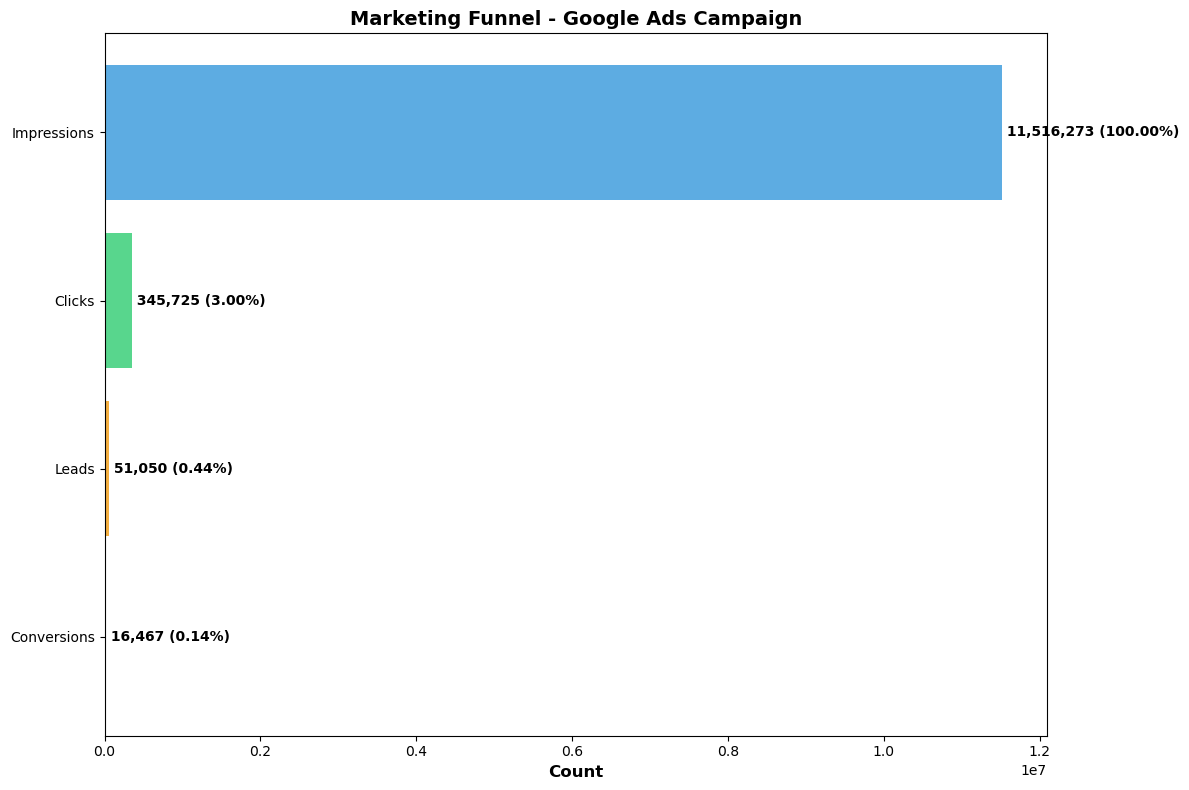

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

stages = list(funnel_stages.keys())
values = list(funnel_stages.values())
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

ax.barh(stages, values, color=colors, alpha=0.8)

ax.set_xlabel('Count', fontsize=12, fontweight='bold')
ax.set_title('Marketing Funnel - Google Ads Campaign', fontsize=14, fontweight='bold')
ax.invert_yaxis()

for stage, value in zip(stages, values):
    pct = (value / total_impressions) * 100
    ax.text(value, stage, f' {value:,.0f} ({pct:.2f}%)',
            va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### ROI Analysis

In [19]:
total_cost = df['Cost'].sum()
total_revenue = df['Sale_Amount'].sum()
total_profit = total_revenue - total_cost
overall_roi = (total_profit / total_cost) * 100

print("Overall Campaign Performance:")
print(f"Total Investment (Cost):    ${total_cost:,.2f}")
print(f"Total Revenue:              ${total_revenue:,.2f}")
print(f"Total Profit:               ${total_profit:,.2f}")
print(f"Overall ROI:                {overall_roi:.2f}%")

Overall Campaign Performance:
Total Investment (Cost):    $538,371.83
Total Revenue:              $3,688,173.00
Total Profit:               $3,149,801.17
Overall ROI:                585.06%


### ROI by Device

In [20]:
roi_by_device = df.groupby('Device').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Profit': 'sum',
    'Conversions': 'sum'
})
roi_by_device['ROI_%'] = (roi_by_device['Profit'] / roi_by_device['Cost']) * 100
roi_by_device = roi_by_device.sort_values('ROI_%', ascending=False)

print("\nROI by Device:")
roi_by_device


ROI by Device:


,Cost,Sale_Amount,Profit,Conversions,ROI_%
Device,,,,,
Desktop,183786.04,1264233.0,1044942.61,5632.0,568.564734
Tablet,171027.48,1188131.0,971944.19,5190.0,568.297089
Mobile,183558.31,1235809.0,1022852.75,5645.0,557.235872


### Top 10 keywords by ROI

In [21]:
roi_by_keyword = df.groupby('Keyword').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Profit': 'sum',
    'Conversions': 'sum'
})
roi_by_keyword['ROI_%'] = (roi_by_keyword['Profit'] / roi_by_keyword['Cost']) * 100
roi_by_keyword = roi_by_keyword.sort_values('ROI_%', ascending=False)

print("Top 10 Keywords by ROI:")
roi_by_keyword.head(10)

Top 10 Keywords by ROI:


,Cost,Sale_Amount,Profit,Conversions,ROI_%
Keyword,,,,,
data analyticss course,90792.01,634723.0,529432.51,2806.0,583.126764
data analytics training,85449.43,590040.0,488659.17,2654.0,571.869432
learn data analyticss,93497.47,643359.0,534241.65,2823.0,571.396905
analyticss for data,89072.83,612229.0,501165.16,2687.0,562.646499
data analitics online,85859.33,579245.0,473991.78,2628.0,552.056230
online data analyticss,93700.76,628577.0,512249.28,2869.0,546.686366


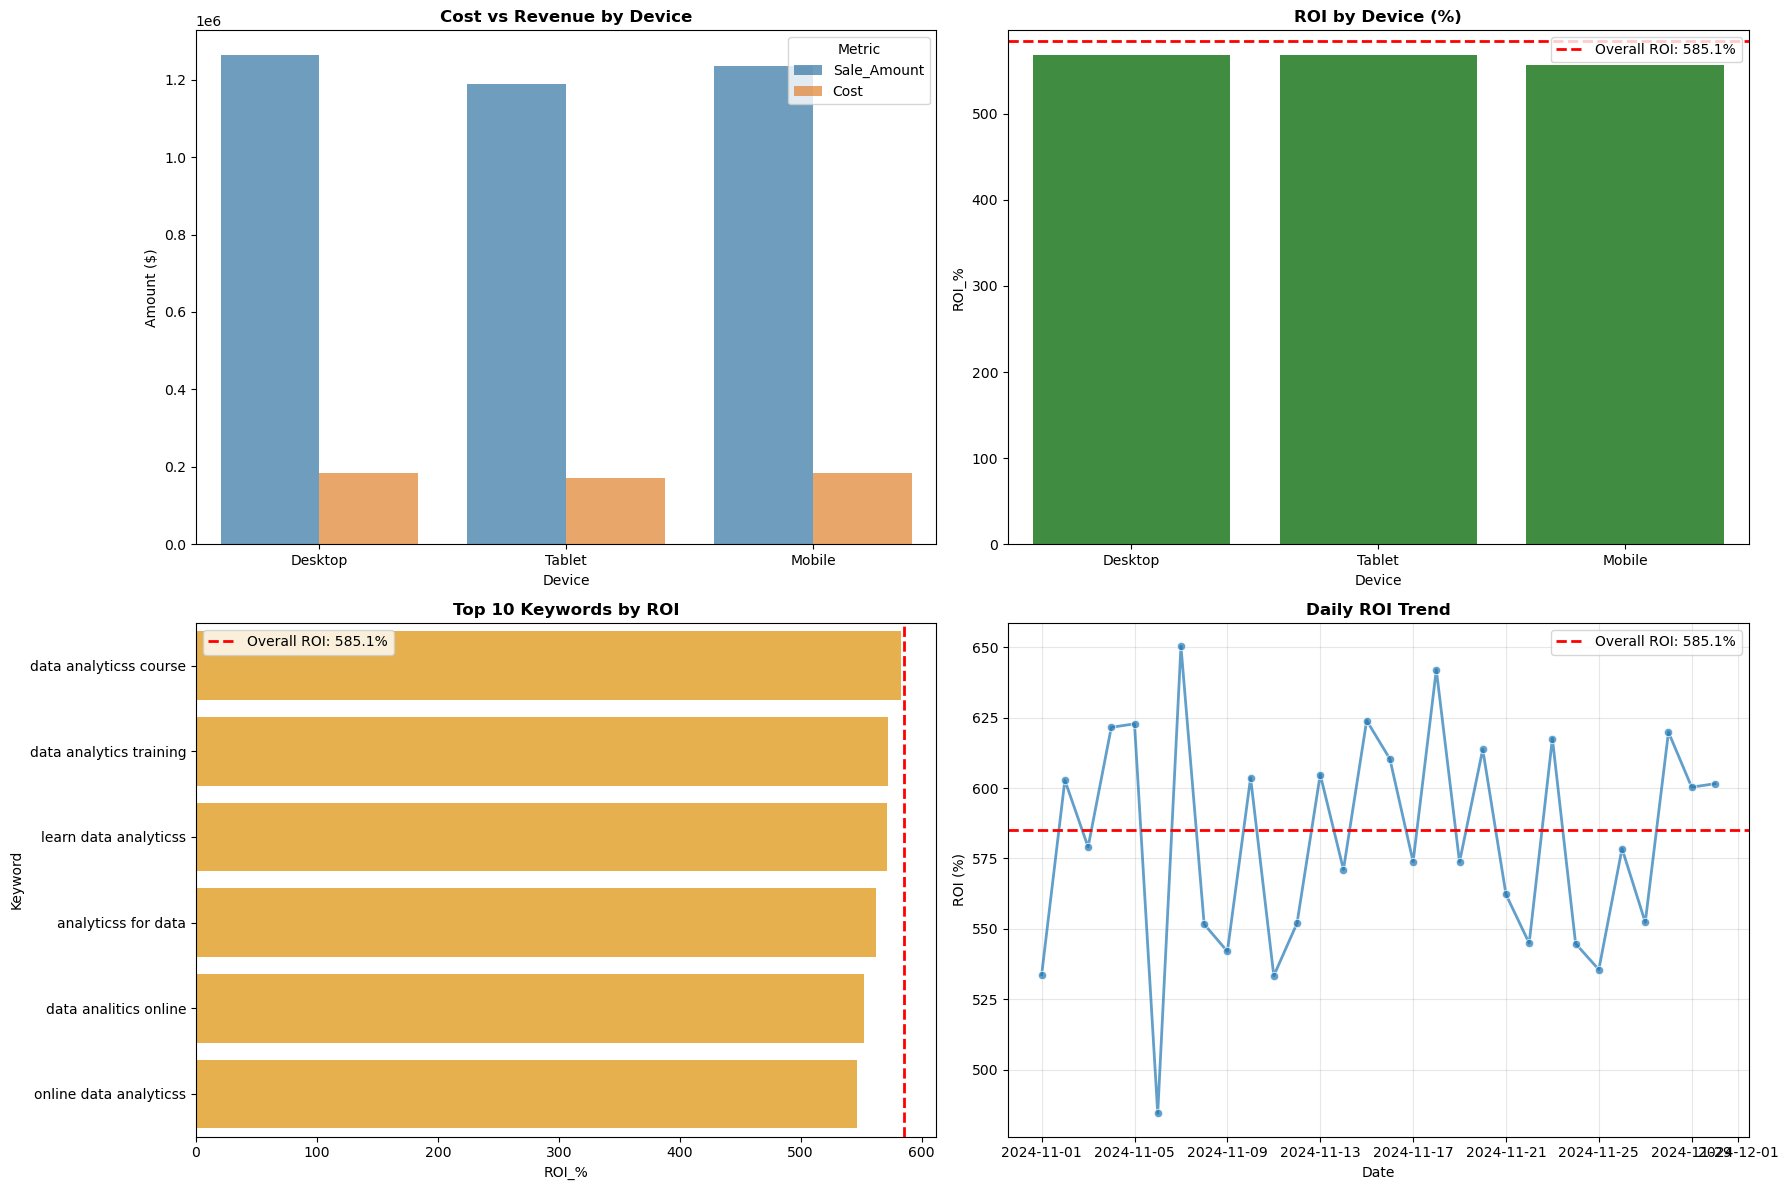

In [22]:

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# ---- Plot 1 ----
sns.barplot(
    data=roi_by_device.reset_index().melt(id_vars="Device", value_vars=["Sale_Amount", "Cost"]),
    x="Device",
    y="value",
    hue="variable",
    ax=axes[0, 0],
    alpha=0.7
)
axes[0, 0].set_title("Cost vs Revenue by Device", fontweight="bold")
axes[0, 0].set_ylabel("Amount ($)")
axes[0, 0].legend(title="Metric")

# ---- Plot 2 ----
sns.barplot(
    data=roi_by_device.reset_index(),
    x="Device",
    y="ROI_%",
    color="green",
    alpha=0.8,
    ax=axes[0, 1]
)
axes[0, 1].set_title("ROI by Device (%)", fontweight="bold")
axes[0, 1].axhline(
    y=overall_roi,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Overall ROI: {overall_roi:.1f}%"
)
axes[0, 1].legend()

# ---- Plot 3 ----

top_keywords = roi_by_keyword.nlargest(10, "ROI_%")
sns.barplot(
    data=top_keywords,
    y=top_keywords.index,
    x="ROI_%",
    color="orange",
    alpha=0.8,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Top 10 Keywords by ROI", fontweight="bold")
axes[1, 0].axvline(
    x=overall_roi,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Overall ROI: {overall_roi:.1f}%"
)
axes[1, 0].legend()

# ---- Plot 4 ----
daily_roi = df.groupby("Ad_Date").agg({"Cost": "sum", "Sale_Amount": "sum"})
daily_roi["ROI_%"] = (daily_roi["Sale_Amount"] - daily_roi["Cost"]) / daily_roi["Cost"] * 100

sns.lineplot(
    data=daily_roi.reset_index(),
    x="Ad_Date",
    y="ROI_%",
    marker="o",
    linewidth=2,
    alpha=0.7,
    ax=axes[1, 1]
)
axes[1, 1].axhline(
    y=overall_roi,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Overall ROI: {overall_roi:.1f}%"
)
axes[1, 1].set_title("Daily ROI Trend", fontweight="bold")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("ROI (%)")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Budget Optimization Analysis

In [23]:
current_allocation = df.groupby('Device').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Profit': 'sum',
    'Conversions': 'sum'
})

total_cost = current_allocation['Cost'].sum()

current_allocation = current_allocation.assign(
    Current_Budget_percent = lambda x: (x['Cost'] / total_cost) * 100,
    Revenue_percent = lambda x: (x['Sale_Amount'] / x['Sale_Amount'].sum()) * 100,
    ROI_percent = lambda x: (x['Profit'] / x['Cost']) * 100,
    Cost_Per_Conversion = lambda x: x['Cost'] / x['Conversions']
)

# Finding the optimal budget - assigning budget according to the revenue generated 
current_allocation = current_allocation.assign(
    Optimal_Budget_percent = lambda x: (x['ROI_percent'] / x['ROI_percent'].sum()) * 100,
    Optimal_Budget_dollar = lambda x: (x['Optimal_Budget_percent'] / 100) * total_cost,
    Budget_Shift_dollar = lambda x: x['Optimal_Budget_dollar'] - x['Cost'],
    Budget_Shift_percent = lambda x: (x['Budget_Shift_dollar'] / x['Cost']) * 100
)

avg_revenue_per_dollar = (current_allocation['Sale_Amount'] / current_allocation['Cost']).clip(lower=0)
expected_revenue_increase = (current_allocation['Budget_Shift_dollar'].clip(lower=0) * avg_revenue_per_dollar).sum()

current_total_revenue = current_allocation['Sale_Amount'].sum()
roi_improvement_percentage = (expected_revenue_increase / current_total_revenue) * 100

print("\nOptimization Recommendations:")
print(f"Expected Additional Revenue:  ${expected_revenue_increase:,.2f}")
print(f"Potential ROI Improvement:    {roi_improvement_percentage:.2f}%\n")

for device, shift in current_allocation['Budget_Shift_dollar'].sort_values(ascending=False).items():
    if shift > 0:
        print(f"  → INCREASE {device} budget by ${shift:,.2f} ({current_allocation.loc[device, 'Budget_Shift_percent']:.1f}%)")
    elif shift < 0:
        print(f"  → DECREASE {device} budget by ${abs(shift):,.2f} ({abs(current_allocation.loc[device, 'Budget_Shift_percent']):.1f}%)")


Optimization Recommendations:
Expected Additional Revenue:  $66,504.98
Potential ROI Improvement:    1.80%

  → INCREASE Tablet budget by $9,573.17 (5.6%)
  → DECREASE Desktop budget by $3,100.33 (1.7%)
  → DECREASE Mobile budget by $6,472.83 (3.5%)


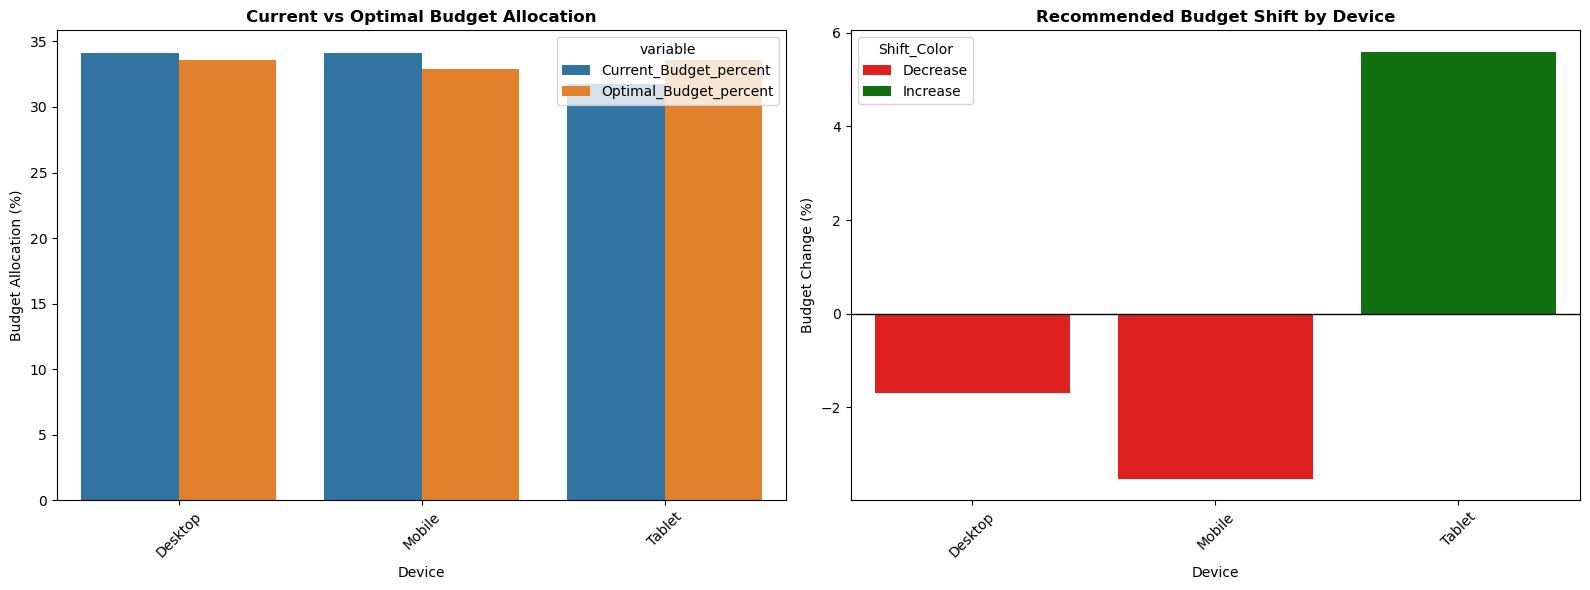

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Current vs Optimal Budget %
comparison_df = current_allocation[['Current_Budget_percent', 'Optimal_Budget_percent']].reset_index().melt(id_vars='Device')
sns.barplot(
    data=comparison_df, 
    x='Device', 
    y='value', 
    hue='variable', 
    ax=axes[0]
)
axes[0].set_title('Current vs Optimal Budget Allocation', fontweight='bold')
axes[0].set_ylabel('Budget Allocation (%)')
axes[0].set_xlabel('Device')
axes[0].tick_params(axis='x', rotation=45)

# Plot Recommended Budget Shift %
current_allocation['Shift_Color'] = current_allocation['Budget_Shift_percent'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

sns.barplot(
    data=current_allocation, 
    x='Device', 
    y='Budget_Shift_percent', 
    hue='Shift_Color', 
    palette={'Increase': 'green', 'Decrease': 'red'}, 
    ax=axes[1],
    dodge=False
)
axes[1].set_title('Recommended Budget Shift by Device', fontweight='bold')
axes[1].set_ylabel('Budget Change (%)')
axes[1].set_xlabel('Device')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Keyword level Budget Optimization

In [25]:

# Aggregate by Keyword
top_keywords = df.groupby('Keyword').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Profit': 'sum',
    'Conversions': 'sum'
}).sort_values(by='Cost', ascending=False)



# Calculate Metrics
top_keywords['Current_Budget_%'] = (top_keywords['Cost'] / top_keywords['Cost'].sum()) * 100
top_keywords['ROI_%'] = (top_keywords['Profit'] / top_keywords['Cost']) * 100

total_budget = top_keywords['Cost'].sum()
top_keywords['Optimal_Budget_%'] = (top_keywords['ROI_%'] / top_keywords['ROI_%'].sum()) * 100
top_keywords['Optimal_Budget_$'] = (top_keywords['Optimal_Budget_%'] / 100) * total_budget
top_keywords['Budget_Shift_$'] = top_keywords['Optimal_Budget_$'] - top_keywords['Cost']
top_keywords['Budget_Shift_%'] = (top_keywords['Budget_Shift_$'] / top_keywords['Cost']) * 100


# Color for Budget Shift
top_keywords['Shift_Color'] = top_keywords['Budget_Shift_%'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')


# Printing Results

print("Current vs Optimal Budget Allocation (Top 10 Keywords):\n")
print(top_keywords[[
    'Cost', 'Current_Budget_%', 'ROI_%', 'Optimal_Budget_%', 'Optimal_Budget_$', 'Budget_Shift_$', 'Budget_Shift_%'
]].round(2))

# Expected revenue increase
expected_revenue_increase = 0
for keyword in top_keywords.index:
    if top_keywords.loc[keyword, 'Budget_Shift_$'] > 0:
        avg_revenue_per_dollar = top_keywords.loc[keyword, 'Sale_Amount'] / top_keywords.loc[keyword, 'Cost']
        expected_revenue_increase += top_keywords.loc[keyword, 'Budget_Shift_$'] * avg_revenue_per_dollar

current_total_revenue = top_keywords['Sale_Amount'].sum()
roi_improvement_percentage = (expected_revenue_increase / current_total_revenue) * 100

print("\nOptimization Recommendations:")
print(f"Expected Additional Revenue:  ${expected_revenue_increase:,.2f}")
print(f"Potential ROI Improvement:    {roi_improvement_percentage:.2f}%")
print(f"\nRecommended Budget Shifts:")
for keyword in top_keywords.sort_values('Budget_Shift_$', ascending=False).index:
    shift = top_keywords.loc[keyword, 'Budget_Shift_$']
    if shift > 0:
        print(f"  → INCREASE budget for '{keyword}' by ${shift:,.2f} ({top_keywords.loc[keyword, 'Budget_Shift_%']:.1f}%)")
    elif shift < 0:
        print(f"  → DECREASE budget for '{keyword}' by ${abs(shift):,.2f} ({abs(top_keywords.loc[keyword, 'Budget_Shift_%']):.1f}%)")


Current vs Optimal Budget Allocation (Top 10 Keywords):

                             Cost  Current_Budget_%   ROI_%  Optimal_Budget_%  \
Keyword                                                                         
online data analyticss   93700.76             17.40  546.69             16.14   
learn data analyticss    93497.47             17.37  571.40             16.87   
data analyticss course   90792.01             16.86  583.13             17.21   
analyticss for data      89072.83             16.54  562.65             16.61   
data analitics online    85859.33             15.95  552.06             16.30   
data analytics training  85449.43             15.87  571.87             16.88   

                         Optimal_Budget_$  Budget_Shift_$  Budget_Shift_%  
Keyword                                                                    
online data analyticss           86877.05        -6823.71           -7.28  
learn data analyticss            90803.95        -2693.52         

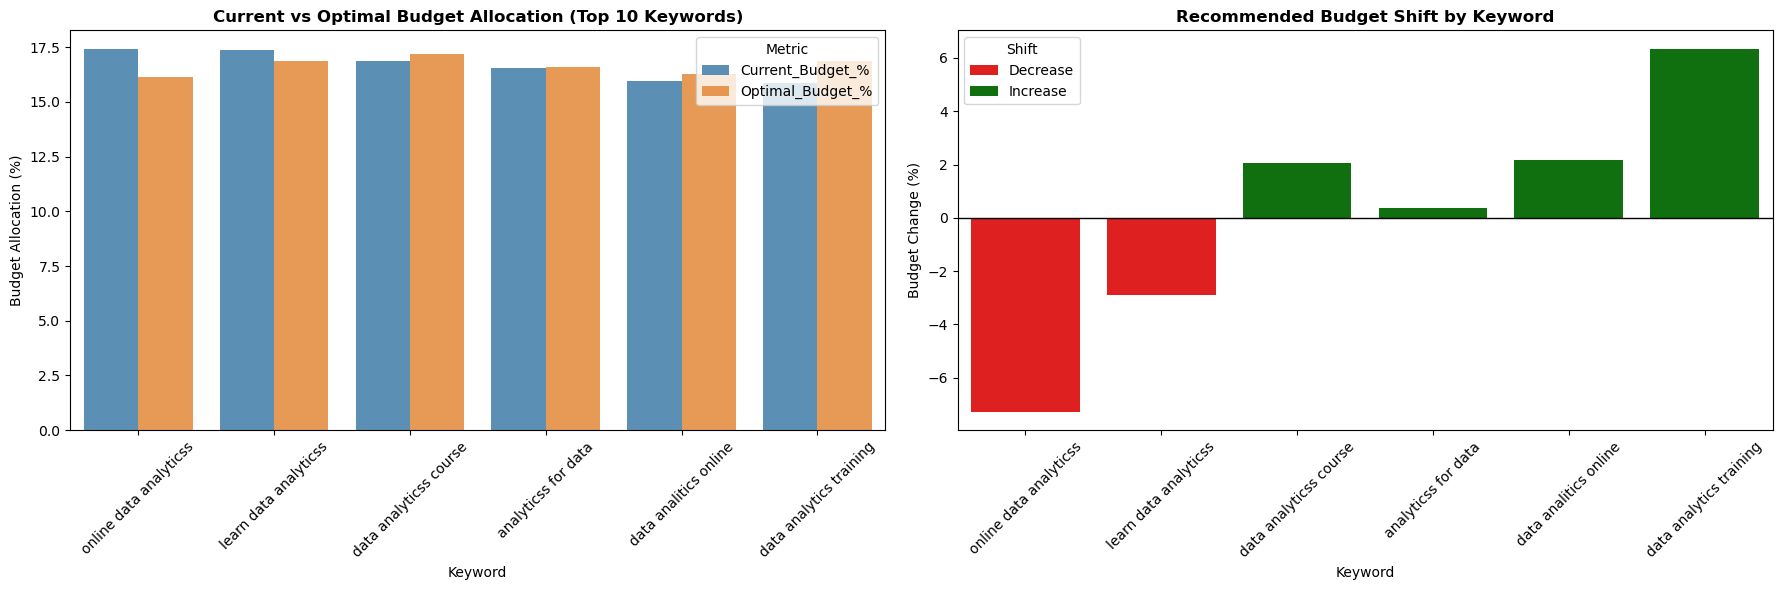

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1 — Current vs Optimal Budget %
sns.barplot(
    data=top_keywords.reset_index().melt(id_vars="Keyword", value_vars=["Current_Budget_%", "Optimal_Budget_%"]),
    x="Keyword",
    y="value",
    hue="variable",
    ax=axes[0],
    alpha=0.8
)
axes[0].set_title("Current vs Optimal Budget Allocation (Top 10 Keywords)", fontweight="bold")
axes[0].set_ylabel("Budget Allocation (%)")
axes[0].set_xlabel("Keyword")
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend(title="Metric")

# Plot 2 — Recommended Budget Shift %
sns.barplot(
    data=top_keywords.reset_index(),
    x="Keyword",
    y="Budget_Shift_%", 
    hue="Shift_Color",
    palette={"Increase": "green", "Decrease": "red"},
    dodge=False,
    ax=axes[1]
)
axes[1].set_title("Recommended Budget Shift by Keyword", fontweight="bold")
axes[1].set_ylabel("Budget Change (%)")
axes[1].set_xlabel("Keyword")
axes[1].tick_params(axis="x", rotation=45)
axes[1].axhline(0, color="black", linewidth=1)
axes[1].legend(title="Shift")

plt.tight_layout()
plt.show()
